In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from statistics import mean

from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

### Import dataset

In [2]:
data = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-02-25/measles.csv'
!curl $data > data.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 7082k  100 7082k    0     0  7869k      0 --:--:-- --:--:-- --:--:-- 7860k


In [3]:
df= pd.read_csv('data.csv')

/Users/jjwilson/opt/miniconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (4,11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df.head(10)

,index,state,year,name,type,city,county,district,enroll,mmr,overall,xrel,xmed,xper,lat,lng
0,1,Arizona,2018-19,A J Mitchell Elementary,Public,Nogales,Santa Cruz,NaN,51.0,100.0,-1.0,NaN,NaN,NaN,31.347819,-110.938031
1,2,Arizona,2018-19,Academy Del Sol,Charter,Tucson,Pima,NaN,22.0,100.0,-1.0,NaN,NaN,NaN,32.221922,-110.896103
2,3,Arizona,2018-19,Academy Del Sol - Hope,Charter,Tucson,Pima,NaN,85.0,100.0,-1.0,NaN,NaN,NaN,32.130493,-111.117005
3,4,Arizona,2018-19,Academy Of Mathematics And Science South,Charter,Phoenix,Maricopa,NaN,60.0,100.0,-1.0,NaN,NaN,NaN,33.485447,-112.130633
4,5,Arizona,2018-19,Acclaim Academy,Charter,Phoenix,Maricopa,NaN,43.0,100.0,-1.0,NaN,2.33,2.33,33.495620,-112.224722
5,6,Arizona,2018-19,Alfred F Garcia,Public,Phoenix,Maricopa,NaN,36.0,100.0,-1.0,NaN,NaN,NaN,33.435319,-112.116828
6,7,Arizona,2018-19,All Aboard Charter,Charter,Phoenix,Maricopa,NaN,24.0,100.0,-1.0,NaN,NaN,4.17,33.523322,-112.133753
7,8,Arizona,2018-19,Amerischools Academy - Yuma South Campus,Charter,Yuma,Yuma,NaN,22.0,100.0,-1.0,NaN,NaN,NaN,32.690013,-114.623427
8,9,Arizona,2018-19,Arizona Cultural Academy,Private,Phoenix,Maricopa,NaN,26.0,100.0,-1.0,NaN,NaN,NaN,33.375616,-111.992910
9,10,Arizona,2018-19,Arizona Desert Elementary,Public,San Luis,Yuma,NaN,78.0,100.0,-1.0,NaN,NaN,NaN,32.500611,-114.781004


In [5]:
df = df.drop(columns=['index', 'district'])

In [6]:
df.isnull().sum()

state          0
year        5681
name           0
type       36622
city       20071
county      6255
enroll     16260
mmr            0
overall        0
xrel       66004
xmed       45122
xper       57560
lat         1549
lng         1549
dtype: int64

In [7]:
df = df.fillna(0)
df.isnull().sum()

state      0
year       0
name       0
type       0
city       0
county     0
enroll     0
mmr        0
overall    0
xrel       0
xmed       0
xper       0
lat        0
lng        0
dtype: int64

### EDA

In [8]:
df.dtypes

state       object
year        object
name        object
type        object
city        object
county      object
enroll     float64
mmr        float64
overall    float64
xrel        object
xmed       float64
xper       float64
lat        float64
lng        float64
dtype: object

In [9]:
df.shape

(66113, 14)

In [10]:
%matplotlib inline

In [11]:
df.overall.mean()

54.08611812072839

In [12]:
df.mmr.mean()

63.166384532349014

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66113 entries, 0 to 66112
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   state    66113 non-null  object 
 1   year     66113 non-null  object 
 2   name     66113 non-null  object 
 3   type     66113 non-null  object 
 4   city     66113 non-null  object 
 5   county   66113 non-null  object 
 6   enroll   66113 non-null  float64
 7   mmr      66113 non-null  float64
 8   overall  66113 non-null  float64
 9   xrel     66113 non-null  object 
 10  xmed     66113 non-null  float64
 11  xper     66113 non-null  float64
 12  lat      66113 non-null  float64
 13  lng      66113 non-null  float64
dtypes: float64(7), object(7)
memory usage: 7.1+ MB


In [14]:
df.nunique()

state         32
year           4
name       36129
type           7
city        5666
county      1158
enroll       966
mmr         4796
overall     2691
xrel           2
xmed        1127
xper        1592
lat        44563
lng        44546
dtype: int64

In [15]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,enroll,mmr,overall,xmed,xper,lat,lng
enroll,1.00,0.21,-0.20,-0.10,-0.09,0.04,-0.00
mmr,0.21,1.00,-0.26,0.00,-0.04,0.22,-0.33
overall,-0.20,-0.26,1.00,0.21,-0.01,-0.27,-0.16
xmed,-0.10,0.00,0.21,1.00,-0.06,0.01,-0.10
xper,-0.09,-0.04,-0.01,-0.06,1.00,0.14,-0.08
lat,0.04,0.22,-0.27,0.01,0.14,1.00,-0.40
lng,-0.00,-0.33,-0.16,-0.10,-0.08,-0.40,1.00


<AxesSubplot:xlabel='overall', ylabel='Count'>

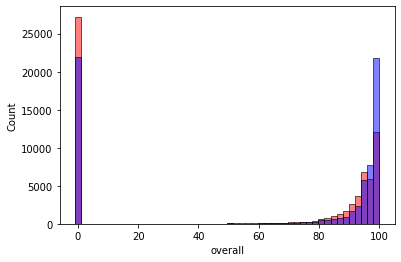

In [16]:
sns.histplot(df.overall, color='red', alpha=0.5, bins=50)
sns.histplot(df.mmr, color='blue', alpha=0.5, bins=50)

In [17]:
#df['overall'] = df['overall'].astype(float)
#df['mmr']     = df['mmr'].astype(float)
#df['enroll']  = df['enroll'].astype(float)

<AxesSubplot:>

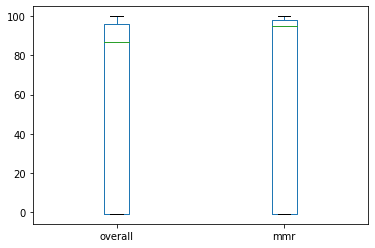

In [18]:
df[['overall','mmr']].plot.box()

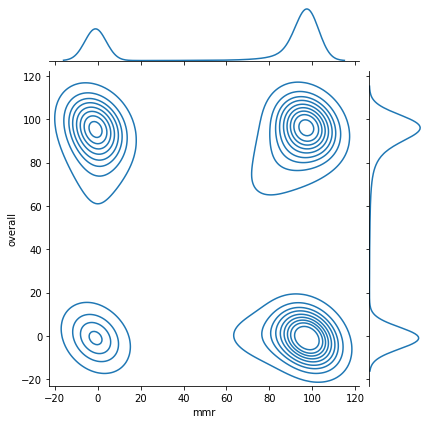

In [19]:
sns.jointplot(x="mmr", y="overall", data=df, kind="kde")

In [20]:
df['xrel'] = df['xrel'].astype(float)
p_xrel = np.log1p(df.xrel)

df['xmed'] = df['xmed'].astype(float)
p_xmed = np.log1p(df.xmed)

df['xper'] = df['xper'].astype(float)
p_xper = np.log1p(df.xper)

<AxesSubplot:xlabel='xrel', ylabel='Count'>

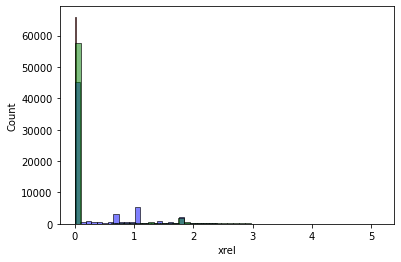

In [21]:
sns.histplot(p_xrel, color='red', alpha=0.5, bins=50)
sns.histplot(p_xmed, color='blue', alpha=0.5, bins=50)
sns.histplot(p_xper, color='green', alpha=0.5, bins=50)

<AxesSubplot:>

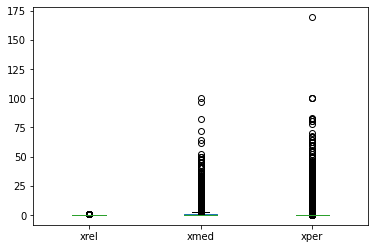

In [22]:
df[['xrel','xmed','xper']].plot.box()

In [23]:
columns = ['overall', 'mmr', 'enroll', 'xrel', 'xmed', 'xper']
df2 = df [columns].copy() 

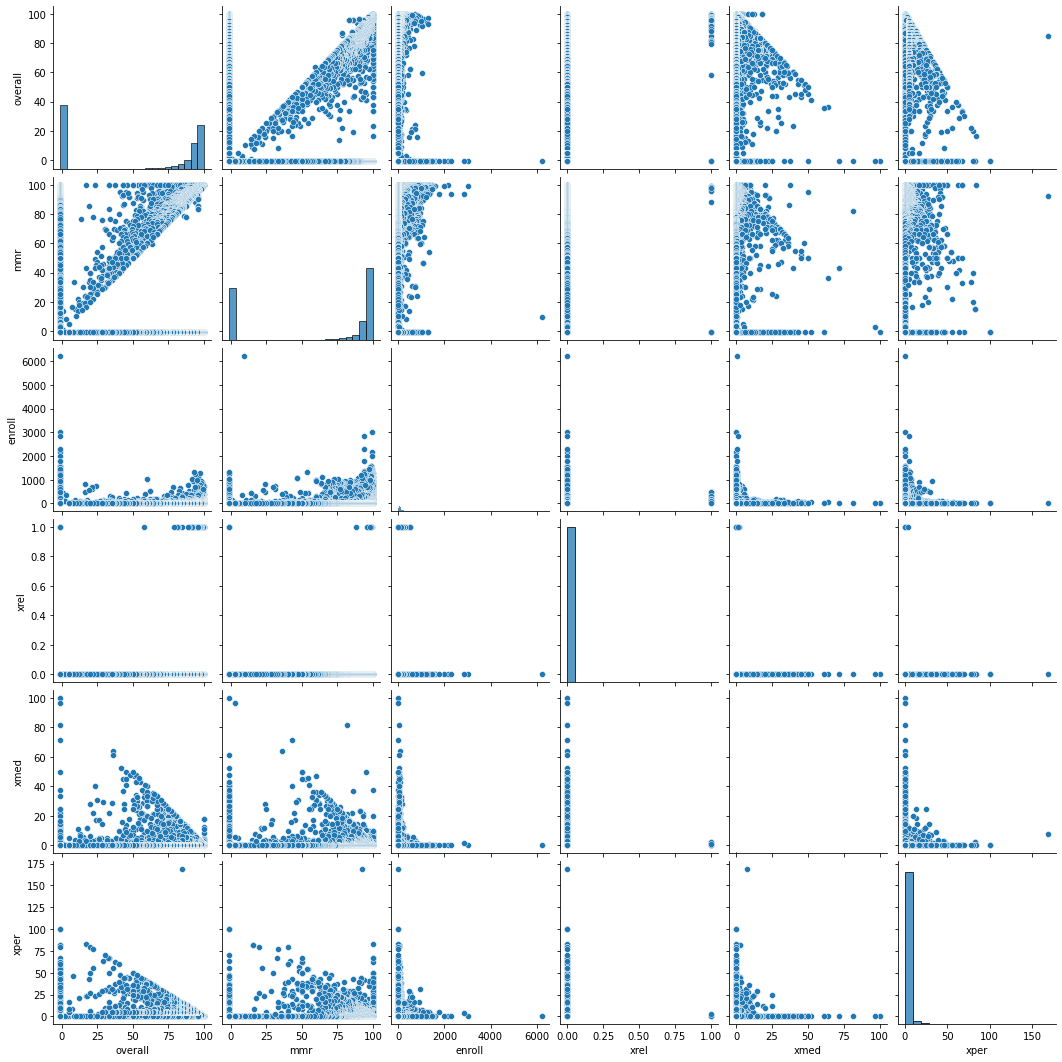

In [24]:
sns.pairplot(df2)     

#### Encode categorical features

In [25]:
df = pd.get_dummies(df, columns=["state"])
df = pd.get_dummies(df, columns=["type"])

In [26]:
df.shape

(66113, 51)

In [27]:
df.head(5)

,year,name,city,county,enroll,mmr,overall,xrel,xmed,xper,...,state_Virginia,state_Washington,state_Wisconsin,type_0,type_BOCES,type_Charter,type_Kindergarten,type_Nonpublic,type_Private,type_Public
0,2018-19,A J Mitchell Elementary,Nogales,Santa Cruz,51.0,100.0,-1.0,0.0,0.00,0.00,...,0,0,0,0,0,0,0,0,0,1
1,2018-19,Academy Del Sol,Tucson,Pima,22.0,100.0,-1.0,0.0,0.00,0.00,...,0,0,0,0,0,1,0,0,0,0
2,2018-19,Academy Del Sol - Hope,Tucson,Pima,85.0,100.0,-1.0,0.0,0.00,0.00,...,0,0,0,0,0,1,0,0,0,0
3,2018-19,Academy Of Mathematics And Science South,Phoenix,Maricopa,60.0,100.0,-1.0,0.0,0.00,0.00,...,0,0,0,0,0,1,0,0,0,0
4,2018-19,Acclaim Academy,Phoenix,Maricopa,43.0,100.0,-1.0,0.0,2.33,2.33,...,0,0,0,0,0,1,0,0,0,0


In [28]:
df.dtypes

year                     object
name                     object
city                     object
county                   object
enroll                  float64
mmr                     float64
overall                 float64
xrel                    float64
xmed                    float64
xper                    float64
lat                     float64
lng                     float64
state_Arizona             uint8
state_Arkansas            uint8
state_California          uint8
state_Colorado            uint8
state_Connecticut         uint8
state_Florida             uint8
state_Idaho               uint8
state_Illinois            uint8
state_Iowa                uint8
state_Maine               uint8
state_Massachusetts       uint8
state_Michigan            uint8
state_Minnesota           uint8
state_Missouri            uint8
state_Montana             uint8
state_New Jersey          uint8
state_New York            uint8
state_North Carolina      uint8
state_North Dakota        uint8
state_Oh

In [29]:
df_factors = list(df.dtypes[df.dtypes == 'uint8'].index)

In [30]:
df_factors

['state_Arizona',
 'state_Arkansas',
 'state_California',
 'state_Colorado',
 'state_Connecticut',
 'state_Florida',
 'state_Idaho',
 'state_Illinois',
 'state_Iowa',
 'state_Maine',
 'state_Massachusetts',
 'state_Michigan',
 'state_Minnesota',
 'state_Missouri',
 'state_Montana',
 'state_New Jersey',
 'state_New York',
 'state_North Carolina',
 'state_North Dakota',
 'state_Ohio',
 'state_Oklahoma',
 'state_Oregon',
 'state_Pennsylvania',
 'state_Rhode Island',
 'state_South Dakota',
 'state_Tennessee',
 'state_Texas',
 'state_Utah',
 'state_Vermont',
 'state_Virginia',
 'state_Washington',
 'state_Wisconsin',
 'type_0',
 'type_BOCES',
 'type_Charter',
 'type_Kindergarten',
 'type_Nonpublic',
 'type_Private',
 'type_Public']

#### Feature importance: correlation

In [31]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,enroll,mmr,overall,xrel,xmed,xper,lat,lng,state_Arizona,state_Arkansas,state_California,state_Colorado,state_Connecticut,state_Florida,state_Idaho,state_Illinois,state_Iowa,state_Maine,state_Massachusetts,state_Michigan,state_Minnesota,state_Missouri,state_Montana,state_New Jersey,state_New York,state_North Carolina,state_North Dakota,state_Ohio,state_Oklahoma,state_Oregon,state_Pennsylvania,state_Rhode Island,state_South Dakota,state_Tennessee,state_Texas,state_Utah,state_Vermont,state_Virginia,state_Washington,state_Wisconsin,type_0,type_BOCES,type_Charter,type_Kindergarten,type_Nonpublic,type_Private,type_Public
enroll,1.00,0.21,-0.20,0.00,-0.10,-0.09,0.04,-0.00,-0.04,0.26,-0.08,-0.04,-0.07,-0.01,-0.06,0.59,0.18,-0.01,-0.10,-0.05,-0.05,-0.07,0.06,-0.06,-0.17,-0.04,-0.03,-0.06,-0.09,-0.03,-0.03,-0.02,-0.03,-0.02,-0.07,0.25,0.03,-0.03,-0.12,-0.13,0.21,-0.02,-0.02,-0.05,-0.03,-0.19,-0.08
mmr,0.21,1.00,-0.26,-0.04,0.00,-0.04,0.22,-0.33,0.04,0.04,0.27,0.10,0.02,-0.29,-0.12,0.27,-0.20,0.05,-0.02,-0.27,0.06,0.06,0.03,-0.26,0.17,-0.25,0.04,0.10,-0.19,0.07,0.13,-0.08,0.05,-0.19,0.07,0.07,0.05,-0.21,0.07,-0.29,-0.42,0.02,0.01,0.10,-0.06,-0.00,0.42
overall,-0.20,-0.26,1.00,0.02,0.21,-0.01,-0.27,-0.16,-0.18,-0.11,0.36,0.11,-0.13,0.17,0.05,-0.43,0.08,-0.09,-0.19,0.16,-0.20,-0.13,-0.12,0.14,-0.31,0.17,-0.09,0.13,0.07,0.09,-0.21,0.04,-0.09,0.12,-0.13,-0.11,0.05,0.12,0.08,0.12,-0.09,-0.03,-0.08,0.11,-0.06,-0.18,0.20
xrel,0.00,-0.04,0.02,1.00,-0.01,-0.01,-0.01,0.03,-0.01,-0.00,-0.02,-0.01,-0.00,-0.00,-0.00,-0.00,-0.01,-0.00,-0.01,-0.01,-0.01,-0.00,-0.00,0.02,0.00,0.08,-0.00,-0.01,-0.01,-0.00,-0.01,-0.00,-0.00,0.08,-0.00,-0.00,-0.00,0.00,-0.01,-0.01,0.03,-0.00,-0.00,-0.01,-0.00,-0.01,-0.02
xmed,-0.10,0.00,0.21,-0.01,1.00,-0.06,0.01,-0.10,-0.04,-0.03,0.17,-0.05,-0.03,-0.04,-0.01,-0.11,-0.05,-0.01,-0.00,0.34,-0.05,-0.04,-0.03,-0.05,-0.07,-0.06,-0.02,0.15,0.07,-0.04,-0.06,0.01,-0.03,-0.04,-0.04,-0.03,-0.03,-0.04,-0.01,-0.07,-0.14,-0.00,-0.02,-0.05,-0.02,0.09,0.11
xper,-0.09,-0.04,-0.01,-0.01,-0.06,1.00,0.14,-0.08,0.17,-0.02,-0.14,0.17,-0.03,-0.05,-0.02,-0.09,-0.04,0.13,-0.04,-0.05,0.11,-0.03,-0.02,-0.05,-0.06,-0.04,0.06,-0.06,-0.03,0.09,-0.04,-0.01,-0.02,-0.03,-0.03,0.09,-0.02,-0.04,0.17,0.36,0.07,-0.01,0.12,0.16,-0.01,-0.07,-0.10
lat,0.04,0.22,-0.27,-0.01,0.01,0.14,1.00,-0.40,-0.10,-0.04,-0.20,0.03,0.05,-0.29,0.07,0.14,0.07,0.06,0.09,0.12,0.15,0.00,0.11,0.05,0.13,-0.06,0.09,0.07,-0.05,0.10,0.05,0.03,0.06,-0.04,-0.11,0.03,0.06,-0.77,0.23,0.15,0.06,0.02,-0.04,0.03,0.02,0.01,-0.08
lng,-0.00,-0.33,-0.16,0.03,-0.10,-0.08,-0.40,1.00,-0.11,0.01,-0.61,-0.07,0.10,0.11,-0.08,0.09,0.01,0.08,0.15,0.08,0.00,0.01,-0.07,0.16,0.21,0.11,-0.02,0.11,-0.02,-0.14,0.13,0.06,-0.02,0.04,-0.01,-0.07,0.15,0.61,-0.22,0.04,0.37,0.02,-0.05,-0.07,0.05,-0.00,-0.37
state_Arizona,-0.04,0.04,-0.18,-0.01,-0.04,0.17,-0.10,-0.11,1.00,-0.01,-0.08,-0.02,-0.02,-0.03,-0.01,-0.05,-0.02,-0.01,-0.02,-0.03,-0.03,-0.02,-0.01,-0.03,-0.04,-0.03,-0.01,-0.03,-0.02,-0.02,-0.03,-0.01,-0.01,-0.02,-0.02,-0.01,-0.01,-0.02,-0.03,-0.03,-0.17,-0.00,0.43,-0.02,-0.01,0.03,0.11
state_Arkansas,0.26,0.04,-0.11,-0.00,-0.03,-0.02,-0.04,0.01,-0.01,1.00,-0.05,-0.01,-0.01,-0.02,-0.01,-0.03,-0.01,-0.01,-0.01,-0.02,-0.02,-0.01,-0.01,-0.02,-0.02,-0.02,-0.01,-0.02,-0.01,-0.01,-0.02,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.02,-0.02,0.08,-0.00,-0.01,-0.01,-0.00,-0.03,-0.06


#### Feature importance: mutual information

In [32]:
def mutual_info_av_rating_score(series):
    return mutual_info_score(series, df.mmr > np.median(df.mmr))

In [33]:
mi = df[df_factors].apply(mutual_info_av_rating_score).round(2)
mi.sort_values(ascending=False)

type_Public             0.06
state_Illinois          0.05
type_0                  0.04
state_Florida           0.03
state_Wisconsin         0.03
state_California        0.02
state_Michigan          0.02
state_New Jersey        0.02
state_New York          0.02
state_North Carolina    0.02
state_Arkansas          0.01
state_Iowa              0.01
state_Pennsylvania      0.01
state_Tennessee         0.01
state_Oklahoma          0.01
state_Virginia          0.01
type_Private            0.00
state_Utah              0.00
state_Vermont           0.00
state_Washington        0.00
type_Nonpublic          0.00
type_BOCES              0.00
type_Charter            0.00
type_Kindergarten       0.00
state_Texas             0.00
state_Arizona           0.00
state_South Dakota      0.00
state_Rhode Island      0.00
state_Oregon            0.00
state_North Dakota      0.00
state_Montana           0.00
state_Missouri          0.00
state_Minnesota         0.00
state_Massachusetts     0.00
state_Maine   

### Setting up the validation framework

#### Split data

In [34]:
df_full_train, df_test = train_test_split(df,            test_size=0.2,  random_state=42)
df_train, df_val       = train_test_split(df_full_train, test_size=0.25, random_state=42)

len(df_train), len(df_val), len(df_test)

df_train = df_train.reset_index(drop=True)
df_val   = df_val.reset_index(drop=True)
df_test  = df_test.reset_index(drop=True)

y_full_train = df_full_train.mmr.values
y_train      = df_train.mmr.values
y_val        = df_val.mmr.values
y_test       = df_test.mmr.values

del df_full_train['mmr']
del df_train['mmr']
del df_val['mmr']
del df_test['mmr']

In [35]:
dv = DictVectorizer(sparse=False)

train_dict      = df_train[df_factors].to_dict(orient='records')
X_train         = dv.fit_transform(train_dict)
X_full_train    = dv.fit_transform(train_dict)

val_dict   = df_val[df_factors].to_dict(orient='records')
X_val      = dv.transform(val_dict)

X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

## Models

### Model: Linear Neural Net

In [36]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.asarray(X_train))

In [37]:
linear_model = tf.keras.Sequential([normalizer,layers.Dense(units=1)])
linear_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 39)               79        
 n)                                                              
                                                                 
 dense (Dense)               (None, 1)                 40        
                                                                 
Total params: 119
Trainable params: 40
Non-trainable params: 79
_________________________________________________________________


In [38]:
linear_model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.1),loss='mean_squared_error')
linear_history = linear_model.fit(X_train,y_train,epochs=100,validation_data=(np.asarray(X_val),y_val))


Epoch 1/100
1240/1240 [==============================] - 2s 1ms/step - loss: 1311.4994 - val_loss: 448.0542
Epoch 2/100
1240/1240 [==============================] - 2s 1ms/step - loss: 412.9876 - val_loss: 449.4593
Epoch 3/100
1240/1240 [==============================] - 1s 1ms/step - loss: 413.9802 - val_loss: 452.2860
Epoch 4/100
1240/1240 [==============================] - 2s 1ms/step - loss: 413.8467 - val_loss: 451.5098
Epoch 5/100
1240/1240 [==============================] - 2s 1ms/step - loss: 414.6281 - val_loss: 449.2898
Epoch 6/100
1240/1240 [==============================] - 2s 1ms/step - loss: 414.2953 - val_loss: 445.3080
Epoch 7/100
1240/1240 [==============================] - 2s 1ms/step - loss: 414.3552 - val_loss: 449.1718
Epoch 8/100
1240/1240 [==============================] - 2s 1ms/step - loss: 414.8966 - val_loss: 444.8174
Epoch 9/100
1240/1240 [==============================] - 2s 1ms/step - loss: 413.9306 - val_loss: 448.2245
Epoch 10/100
1240/1240 [============

Epoch 77/100
1240/1240 [==============================] - 1s 1ms/step - loss: 414.8660 - val_loss: 445.4364
Epoch 78/100
1240/1240 [==============================] - 2s 1ms/step - loss: 414.0661 - val_loss: 449.6786
Epoch 79/100
1240/1240 [==============================] - 2s 1ms/step - loss: 414.4162 - val_loss: 445.9741
Epoch 80/100
1240/1240 [==============================] - 2s 1ms/step - loss: 414.7060 - val_loss: 447.9996
Epoch 81/100
1240/1240 [==============================] - 2s 1ms/step - loss: 414.4949 - val_loss: 446.8284
Epoch 82/100
1240/1240 [==============================] - 2s 1ms/step - loss: 413.9783 - val_loss: 447.4016
Epoch 83/100
1240/1240 [==============================] - 2s 1ms/step - loss: 414.6999 - val_loss: 451.3681
Epoch 84/100
1240/1240 [==============================] - 2s 1ms/step - loss: 414.1309 - val_loss: 448.0117
Epoch 85/100
1240/1240 [==============================] - 2s 1ms/step - loss: 414.4974 - val_loss: 449.3531
Epoch 86/100
1240/1240 [====

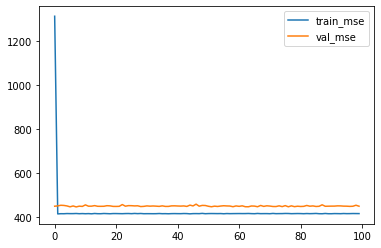

In [39]:
plt.plot(linear_history.history['loss'],label='train_mse')
plt.plot(linear_history.history['val_loss'],label='val_mse')
plt.legend()

### Tuning linear model: Learning rate

In [40]:
def train_linear_NN(X_train,y_train,X_val,y_val,learning_rate=0.1):
    normalizer = tf.keras.layers.Normalization(axis=-1)
    normalizer.adapt(np.asarray(X_train))
    
    linear_model = tf.keras.Sequential([normalizer,layers.Dense(units=1)])
    linear_model.summary()
    
    linear_model.compile(optimizer=tf.optimizers.Adam(learning_rate=learning_rate)
                    ,loss='mean_squared_error')
    linear_history = linear_model.fit(X_train,y_train,epochs=100,validation_data=(np.asarray(X_val),y_val))
    return linear_history

In [41]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)

    history = train_linear_NN(X_train,y_train,X_val,y_val,learning_rate=lr)
    scores[lr] = history.history

    print()
    print()

0.0001
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 39)               79        
 ion)                                                            
                                                                 
 dense_1 (Dense)             (None, 1)                 40        
                                                                 
Total params: 119
Trainable params: 40
Non-trainable params: 79
_________________________________________________________________
Epoch 1/100
1240/1240 [==============================] - 2s 1ms/step - loss: 6081.3320 - val_loss: 6001.4219
Epoch 2/100
1240/1240 [==============================] - 2s 1ms/step - loss: 6024.7383 - val_loss: 5945.5586
Epoch 3/100
1240/1240 [==============================] - 2s 1ms/step - loss: 5969.0586 - val_loss: 5890.4800
Epoch 4/100
1240/1240 [=============================

1240/1240 [==============================] - 1s 1ms/step - loss: 3701.6128 - val_loss: 3662.5635
Epoch 69/100
1240/1240 [==============================] - 2s 1ms/step - loss: 3680.9153 - val_loss: 3642.3464
Epoch 70/100
1240/1240 [==============================] - 2s 1ms/step - loss: 3660.4907 - val_loss: 3622.4094
Epoch 71/100
1240/1240 [==============================] - 2s 1ms/step - loss: 3640.3220 - val_loss: 3602.7380
Epoch 72/100
1240/1240 [==============================] - 1s 1ms/step - loss: 3620.3733 - val_loss: 3583.2378
Epoch 73/100
1240/1240 [==============================] - 2s 1ms/step - loss: 3600.6235 - val_loss: 3563.9385
Epoch 74/100
1240/1240 [==============================] - 2s 1ms/step - loss: 3581.0701 - val_loss: 3544.8389
Epoch 75/100
1240/1240 [==============================] - 2s 1ms/step - loss: 3561.7100 - val_loss: 3525.9412
Epoch 76/100
1240/1240 [==============================] - 2s 1ms/step - loss: 3542.5547 - val_loss: 3507.2305
Epoch 77/100
1240/1240 

Epoch 36/100
1240/1240 [==============================] - 1s 1ms/step - loss: 835.5446 - val_loss: 830.9905
Epoch 37/100
1240/1240 [==============================] - 1s 1ms/step - loss: 788.6516 - val_loss: 786.4548
Epoch 38/100
1240/1240 [==============================] - 1s 1ms/step - loss: 744.6887 - val_loss: 744.8773
Epoch 39/100
1240/1240 [==============================] - 1s 1ms/step - loss: 703.6451 - val_loss: 706.2284
Epoch 40/100
1240/1240 [==============================] - 2s 1ms/step - loss: 665.4935 - val_loss: 670.3741
Epoch 41/100
1240/1240 [==============================] - 1s 1ms/step - loss: 630.1236 - val_loss: 637.3647
Epoch 42/100
1240/1240 [==============================] - 1s 1ms/step - loss: 597.6406 - val_loss: 607.1956
Epoch 43/100
1240/1240 [==============================] - 1s 1ms/step - loss: 568.0120 - val_loss: 579.8713
Epoch 44/100
1240/1240 [==============================] - 1s 1ms/step - loss: 541.2046 - val_loss: 555.3065
Epoch 45/100
1240/1240 [====

Epoch 5/100
1240/1240 [==============================] - 2s 1ms/step - loss: 701.8638 - val_loss: 600.7913
Epoch 6/100
1240/1240 [==============================] - 2s 1ms/step - loss: 501.8896 - val_loss: 478.1624
Epoch 7/100
1240/1240 [==============================] - 2s 1ms/step - loss: 425.8719 - val_loss: 445.9588
Epoch 8/100
1240/1240 [==============================] - 2s 1ms/step - loss: 410.1793 - val_loss: 443.9308
Epoch 9/100
1240/1240 [==============================] - 1s 1ms/step - loss: 409.1814 - val_loss: 443.9157
Epoch 10/100
1240/1240 [==============================] - 2s 1ms/step - loss: 409.2117 - val_loss: 443.7655
Epoch 11/100
1240/1240 [==============================] - 1s 1ms/step - loss: 409.0965 - val_loss: 444.2601
Epoch 12/100
1240/1240 [==============================] - 1s 1ms/step - loss: 409.1685 - val_loss: 443.4285
Epoch 13/100
1240/1240 [==============================] - 2s 1ms/step - loss: 408.9668 - val_loss: 443.9622
Epoch 14/100
1240/1240 [=========

Epoch 81/100
1240/1240 [==============================] - 2s 1ms/step - loss: 408.9718 - val_loss: 443.9876
Epoch 82/100
1240/1240 [==============================] - 1s 1ms/step - loss: 408.9868 - val_loss: 444.0182
Epoch 83/100
1240/1240 [==============================] - 1s 1ms/step - loss: 408.9279 - val_loss: 443.7437
Epoch 84/100
1240/1240 [==============================] - 1s 1ms/step - loss: 408.8596 - val_loss: 444.0083
Epoch 85/100
1240/1240 [==============================] - 1s 1ms/step - loss: 408.9707 - val_loss: 443.6720
Epoch 86/100
1240/1240 [==============================] - 1s 1ms/step - loss: 408.9849 - val_loss: 443.8409
Epoch 87/100
1240/1240 [==============================] - 1s 1ms/step - loss: 408.9771 - val_loss: 444.1929
Epoch 88/100
1240/1240 [==============================] - 2s 1ms/step - loss: 408.9985 - val_loss: 443.5440
Epoch 89/100
1240/1240 [==============================] - 1s 1ms/step - loss: 409.0677 - val_loss: 443.7328
Epoch 90/100
1240/1240 [====

Epoch 50/100
1240/1240 [==============================] - 2s 1ms/step - loss: 414.0473 - val_loss: 451.1430
Epoch 51/100
1240/1240 [==============================] - 1s 1ms/step - loss: 414.4277 - val_loss: 451.8263
Epoch 52/100
1240/1240 [==============================] - 2s 1ms/step - loss: 414.0819 - val_loss: 450.4002
Epoch 53/100
1240/1240 [==============================] - 2s 1ms/step - loss: 414.4928 - val_loss: 448.8451
Epoch 54/100
1240/1240 [==============================] - 2s 1ms/step - loss: 415.2567 - val_loss: 446.8474
Epoch 55/100
1240/1240 [==============================] - 2s 1ms/step - loss: 414.1978 - val_loss: 449.9800
Epoch 56/100
1240/1240 [==============================] - 2s 1ms/step - loss: 414.8548 - val_loss: 452.1051
Epoch 57/100
1240/1240 [==============================] - 2s 1ms/step - loss: 413.8773 - val_loss: 449.7954
Epoch 58/100
1240/1240 [==============================] - 2s 1ms/step - loss: 414.5639 - val_loss: 445.7016
Epoch 59/100
1240/1240 [====

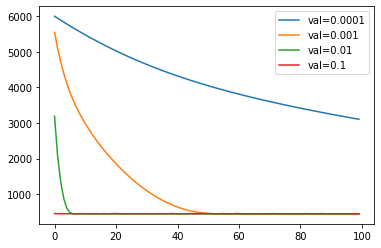

In [42]:
for lr, hist in scores.items():
    #plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_loss'], label=('val=%s' % lr))

plt.legend()

In [43]:
#Optimal lr 0.1

### Model: Convolutional Neural net

In [44]:
n_model = tf.keras.Sequential([normalizer,layers.Dense(64,activation='relu'),layers.Dense(units=1)])
n_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 39)               79        
 n)                                                              
                                                                 
 dense_5 (Dense)             (None, 64)                2560      
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2,704
Trainable params: 2,625
Non-trainable params: 79
_________________________________________________________________


In [45]:
n_model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.1),loss='mean_squared_error')
n_history = n_model.fit(X_train,y_train,epochs=100,validation_data=(np.asarray(X_val),y_val))

Epoch 1/100
1240/1240 [==============================] - 2s 1ms/step - loss: 479.4894 - val_loss: 464.1800
Epoch 2/100
1240/1240 [==============================] - 2s 1ms/step - loss: 418.5852 - val_loss: 449.4496
Epoch 3/100
1240/1240 [==============================] - 2s 1ms/step - loss: 407.8340 - val_loss: 439.5615
Epoch 4/100
1240/1240 [==============================] - 2s 1ms/step - loss: 469.5268 - val_loss: 451.0549
Epoch 5/100
1240/1240 [==============================] - 2s 1ms/step - loss: 406.7981 - val_loss: 444.7508
Epoch 6/100
1240/1240 [==============================] - 2s 2ms/step - loss: 407.8456 - val_loss: 434.4460
Epoch 7/100
1240/1240 [==============================] - 2s 1ms/step - loss: 418.8159 - val_loss: 447.9319
Epoch 8/100
1240/1240 [==============================] - 2s 2ms/step - loss: 404.8346 - val_loss: 432.8421
Epoch 9/100
1240/1240 [==============================] - 2s 2ms/step - loss: 404.5702 - val_loss: 460.5403
Epoch 10/100
1240/1240 [=============

Epoch 77/100
1240/1240 [==============================] - 2s 2ms/step - loss: 410.2908 - val_loss: 467.4120
Epoch 78/100
1240/1240 [==============================] - 2s 2ms/step - loss: 411.3091 - val_loss: 448.7093
Epoch 79/100
1240/1240 [==============================] - 2s 2ms/step - loss: 412.0085 - val_loss: 442.6023
Epoch 80/100
1240/1240 [==============================] - 2s 2ms/step - loss: 410.7576 - val_loss: 450.3614
Epoch 81/100
1240/1240 [==============================] - 2s 2ms/step - loss: 409.8576 - val_loss: 445.2262
Epoch 82/100
1240/1240 [==============================] - 2s 2ms/step - loss: 404.3486 - val_loss: 439.4775
Epoch 83/100
1240/1240 [==============================] - 2s 2ms/step - loss: 404.3848 - val_loss: 435.5878
Epoch 84/100
1240/1240 [==============================] - 2s 2ms/step - loss: 404.5612 - val_loss: 442.5059
Epoch 85/100
1240/1240 [==============================] - 2s 2ms/step - loss: 405.2151 - val_loss: 439.9951
Epoch 86/100
1240/1240 [====

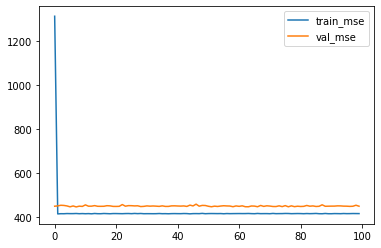

In [46]:
plt.plot(n_history.history['loss'],label='train_mse')
plt.plot(n_history.history['val_loss'],label='val_mse')
plt.legend()

### Tuning Convolutional Neural Net model

In [47]:
def train_c_NN(X_train,y_train,X_val,y_val,layer_size=64,learning_rate=0.1):
    normalizer = tf.keras.layers.Normalization(axis=-1)
    normalizer.adapt(np.asarray(X_train))
    
    c_model = tf.keras.Sequential([normalizer,layers.Dense(layer_size,activation='relu'),layers.Dense(units=1)])
    c_model.summary()
    
    c_model.compile(optimizer=tf.optimizers.Adam(learning_rate=learning_rate)
                    ,loss='mean_squared_error')
    c_history = c_model.fit(X_train,y_train,epochs=100,validation_data=(np.asarray(X_val),y_val))
    return c_history

#### Tuning Convolutional Neural Net model: Learning rate

In [48]:
layer_size=64
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)

    history = train_c_NN(X_train,y_train,X_val,y_val,layer_size=64,learning_rate=lr)
    scores[lr] = history.history

    print()
    print()

0.0001
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_5 (Normalizat  (None, 39)               79        
 ion)                                                            
                                                                 
 dense_7 (Dense)             (None, 64)                2560      
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2,704
Trainable params: 2,625
Non-trainable params: 79
_________________________________________________________________
Epoch 1/100
1240/1240 [==============================] - 2s 2ms/step - loss: 5699.8047 - val_loss: 5134.0933
Epoch 2/100
1240/1240 [==============================] - 2s 1ms/step - loss: 4483.5630 - val_loss: 3677.6982
Epoch 3/100
1240/1240 [=

1240/1240 [==============================] - 2s 1ms/step - loss: 380.2996 - val_loss: 421.0750
Epoch 69/100
1240/1240 [==============================] - 2s 1ms/step - loss: 380.1872 - val_loss: 420.8772
Epoch 70/100
1240/1240 [==============================] - 2s 1ms/step - loss: 380.2755 - val_loss: 421.1840
Epoch 71/100
1240/1240 [==============================] - 2s 1ms/step - loss: 380.2633 - val_loss: 421.1842
Epoch 72/100
1240/1240 [==============================] - 2s 1ms/step - loss: 380.2556 - val_loss: 420.8970
Epoch 73/100
1240/1240 [==============================] - 2s 1ms/step - loss: 380.2459 - val_loss: 421.0243
Epoch 74/100
1240/1240 [==============================] - 2s 1ms/step - loss: 380.2325 - val_loss: 420.9390
Epoch 75/100
1240/1240 [==============================] - 2s 1ms/step - loss: 380.2578 - val_loss: 421.1898
Epoch 76/100
1240/1240 [==============================] - 2s 2ms/step - loss: 380.2430 - val_loss: 420.9657
Epoch 77/100
1240/1240 [=================

Epoch 36/100
1240/1240 [==============================] - 2s 1ms/step - loss: 381.6595 - val_loss: 421.1420
Epoch 37/100
1240/1240 [==============================] - 2s 1ms/step - loss: 381.5406 - val_loss: 421.3291
Epoch 38/100
1240/1240 [==============================] - 2s 1ms/step - loss: 381.4365 - val_loss: 421.9948
Epoch 39/100
1240/1240 [==============================] - 2s 1ms/step - loss: 381.6927 - val_loss: 421.4624
Epoch 40/100
1240/1240 [==============================] - 2s 2ms/step - loss: 381.5713 - val_loss: 422.9183
Epoch 41/100
1240/1240 [==============================] - 2s 1ms/step - loss: 381.5346 - val_loss: 423.9367
Epoch 42/100
1240/1240 [==============================] - 2s 1ms/step - loss: 381.6000 - val_loss: 421.1045
Epoch 43/100
1240/1240 [==============================] - 2s 1ms/step - loss: 381.5844 - val_loss: 423.8738
Epoch 44/100
1240/1240 [==============================] - 2s 1ms/step - loss: 381.7027 - val_loss: 421.8237
Epoch 45/100
1240/1240 [====

1240/1240 [==============================] - 2s 2ms/step - loss: 392.3376 - val_loss: 439.2664
Epoch 4/100
1240/1240 [==============================] - 2s 2ms/step - loss: 391.1978 - val_loss: 436.5694
Epoch 5/100
1240/1240 [==============================] - 2s 1ms/step - loss: 391.0742 - val_loss: 426.2265
Epoch 6/100
1240/1240 [==============================] - 2s 2ms/step - loss: 390.2205 - val_loss: 429.6560
Epoch 7/100
1240/1240 [==============================] - 2s 2ms/step - loss: 390.3442 - val_loss: 426.4661
Epoch 8/100
1240/1240 [==============================] - 2s 2ms/step - loss: 389.5095 - val_loss: 427.5552
Epoch 9/100
1240/1240 [==============================] - 2s 2ms/step - loss: 387.8043 - val_loss: 434.0367
Epoch 10/100
1240/1240 [==============================] - 2s 2ms/step - loss: 390.1400 - val_loss: 438.7808
Epoch 11/100
1240/1240 [==============================] - 2s 2ms/step - loss: 388.8376 - val_loss: 426.2010
Epoch 12/100
1240/1240 [=======================

1240/1240 [==============================] - 2s 1ms/step - loss: 384.1142 - val_loss: 423.4809
Epoch 80/100
1240/1240 [==============================] - 2s 1ms/step - loss: 383.4904 - val_loss: 423.4446
Epoch 81/100
1240/1240 [==============================] - 2s 1ms/step - loss: 384.2211 - val_loss: 423.9273
Epoch 82/100
1240/1240 [==============================] - 2s 1ms/step - loss: 384.2594 - val_loss: 424.0412
Epoch 83/100
1240/1240 [==============================] - 2s 1ms/step - loss: 383.9478 - val_loss: 424.0771
Epoch 84/100
1240/1240 [==============================] - 2s 1ms/step - loss: 383.6855 - val_loss: 425.7355
Epoch 85/100
1240/1240 [==============================] - 2s 1ms/step - loss: 383.9359 - val_loss: 422.0060
Epoch 86/100
1240/1240 [==============================] - 2s 1ms/step - loss: 384.1150 - val_loss: 428.8158
Epoch 87/100
1240/1240 [==============================] - 2s 1ms/step - loss: 383.7611 - val_loss: 421.6011
Epoch 88/100
1240/1240 [=================

Epoch 47/100
1240/1240 [==============================] - 2s 1ms/step - loss: 407.9677 - val_loss: 440.6013
Epoch 48/100
1240/1240 [==============================] - 2s 1ms/step - loss: 406.5871 - val_loss: 435.9850
Epoch 49/100
1240/1240 [==============================] - 2s 1ms/step - loss: 406.8604 - val_loss: 439.8811
Epoch 50/100
1240/1240 [==============================] - 2s 1ms/step - loss: 407.9852 - val_loss: 440.4666
Epoch 51/100
1240/1240 [==============================] - 2s 1ms/step - loss: 407.9554 - val_loss: 443.0824
Epoch 52/100
1240/1240 [==============================] - 2s 1ms/step - loss: 407.2022 - val_loss: 460.9875
Epoch 53/100
1240/1240 [==============================] - 2s 1ms/step - loss: 405.1835 - val_loss: 445.2089
Epoch 54/100
1240/1240 [==============================] - 2s 1ms/step - loss: 404.9076 - val_loss: 442.4317
Epoch 55/100
1240/1240 [==============================] - 2s 1ms/step - loss: 405.9375 - val_loss: 437.0598
Epoch 56/100
1240/1240 [====

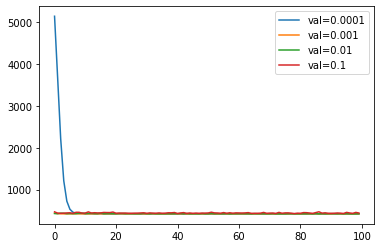

In [49]:
for lr, hist in scores.items():
    #plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_loss'], label=('val=%s' % lr))

plt.legend()

In [50]:
del scores[0.0001]

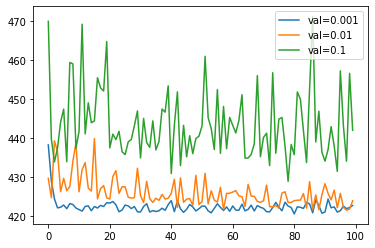

In [51]:
for lr, hist in scores.items():
    #plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_loss'], label=('val=%s' % lr))

plt.legend()

#### Tuning Convolutional Neural Net model: layers

In [52]:
lr = 0.1

scores = {}

for size in [4, 8, 16, 32, 64]:
    print(size)

    history = train_c_NN(X_train,y_train,X_val,y_val,layer_size=size,learning_rate=lr)
    scores[size] = history.history

    print()
    print()

4
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_9 (Normalizat  (None, 39)               79        
 ion)                                                            
                                                                 
 dense_15 (Dense)            (None, 4)                 160       
                                                                 
 dense_16 (Dense)            (None, 1)                 5         
                                                                 
Total params: 244
Trainable params: 165
Non-trainable params: 79
_________________________________________________________________
Epoch 1/100
1240/1240 [==============================] - 2s 2ms/step - loss: 533.3585 - val_loss: 440.0736
Epoch 2/100
1240/1240 [==============================] - 2s 2ms/step - loss: 408.1389 - val_loss: 433.8896
Epoch 3/100
1240/1240 [=============

Epoch 69/100
1240/1240 [==============================] - 2s 2ms/step - loss: 403.6486 - val_loss: 452.4839
Epoch 70/100
1240/1240 [==============================] - 2s 2ms/step - loss: 406.5569 - val_loss: 438.1970
Epoch 71/100
1240/1240 [==============================] - 2s 1ms/step - loss: 404.3295 - val_loss: 466.7908
Epoch 72/100
1240/1240 [==============================] - 2s 2ms/step - loss: 406.7710 - val_loss: 443.1291
Epoch 73/100
1240/1240 [==============================] - 2s 2ms/step - loss: 406.2439 - val_loss: 454.4499
Epoch 74/100
1240/1240 [==============================] - 2s 2ms/step - loss: 406.9160 - val_loss: 453.5819
Epoch 75/100
1240/1240 [==============================] - 2s 1ms/step - loss: 408.6051 - val_loss: 435.7166
Epoch 76/100
1240/1240 [==============================] - 2s 1ms/step - loss: 407.7339 - val_loss: 442.2039
Epoch 77/100
1240/1240 [==============================] - 2s 1ms/step - loss: 404.3839 - val_loss: 439.0273
Epoch 78/100
1240/1240 [====

1240/1240 [==============================] - 2s 2ms/step - loss: 407.8941 - val_loss: 433.1685
Epoch 37/100
1240/1240 [==============================] - 2s 2ms/step - loss: 407.7980 - val_loss: 443.6852
Epoch 38/100
1240/1240 [==============================] - 2s 2ms/step - loss: 407.4828 - val_loss: 460.6875
Epoch 39/100
1240/1240 [==============================] - 2s 1ms/step - loss: 408.2452 - val_loss: 430.6208
Epoch 40/100
1240/1240 [==============================] - 2s 1ms/step - loss: 407.8141 - val_loss: 433.3186
Epoch 41/100
1240/1240 [==============================] - 2s 1ms/step - loss: 404.4680 - val_loss: 452.1706
Epoch 42/100
1240/1240 [==============================] - 2s 1ms/step - loss: 408.5300 - val_loss: 451.8630
Epoch 43/100
1240/1240 [==============================] - 2s 1ms/step - loss: 409.9930 - val_loss: 445.5794
Epoch 44/100
1240/1240 [==============================] - 2s 1ms/step - loss: 406.4471 - val_loss: 450.4511
Epoch 45/100
1240/1240 [=================

Epoch 4/100
1240/1240 [==============================] - 2s 1ms/step - loss: 407.5872 - val_loss: 458.7145
Epoch 5/100
1240/1240 [==============================] - 2s 1ms/step - loss: 408.8483 - val_loss: 461.7219
Epoch 6/100
1240/1240 [==============================] - 2s 1ms/step - loss: 403.8105 - val_loss: 435.3831
Epoch 7/100
1240/1240 [==============================] - 2s 1ms/step - loss: 406.7927 - val_loss: 440.9143
Epoch 8/100
1240/1240 [==============================] - 2s 1ms/step - loss: 401.4708 - val_loss: 431.9330
Epoch 9/100
1240/1240 [==============================] - 2s 1ms/step - loss: 429.5148 - val_loss: 479.6669
Epoch 10/100
1240/1240 [==============================] - 2s 1ms/step - loss: 427.7052 - val_loss: 459.6982
Epoch 11/100
1240/1240 [==============================] - 2s 1ms/step - loss: 425.7342 - val_loss: 455.8546
Epoch 12/100
1240/1240 [==============================] - 2s 1ms/step - loss: 422.8694 - val_loss: 455.2937
Epoch 13/100
1240/1240 [==========

Epoch 80/100
1240/1240 [==============================] - 2s 1ms/step - loss: 402.6446 - val_loss: 436.4580
Epoch 81/100
1240/1240 [==============================] - 2s 1ms/step - loss: 400.6797 - val_loss: 450.9021
Epoch 82/100
1240/1240 [==============================] - 2s 1ms/step - loss: 401.2350 - val_loss: 442.8737
Epoch 83/100
1240/1240 [==============================] - 2s 1ms/step - loss: 404.9248 - val_loss: 434.7956
Epoch 84/100
1240/1240 [==============================] - 2s 1ms/step - loss: 402.0109 - val_loss: 446.6407
Epoch 85/100
1240/1240 [==============================] - 2s 1ms/step - loss: 402.2849 - val_loss: 430.2712
Epoch 86/100
1240/1240 [==============================] - 2s 2ms/step - loss: 402.5862 - val_loss: 446.2042
Epoch 87/100
1240/1240 [==============================] - 2s 2ms/step - loss: 402.7344 - val_loss: 436.0158
Epoch 88/100
1240/1240 [==============================] - 2s 2ms/step - loss: 402.8271 - val_loss: 431.9257
Epoch 89/100
1240/1240 [====

1240/1240 [==============================] - 2s 1ms/step - loss: 398.1818 - val_loss: 432.2082
Epoch 48/100
1240/1240 [==============================] - 2s 1ms/step - loss: 398.7408 - val_loss: 452.8566
Epoch 49/100
1240/1240 [==============================] - 2s 1ms/step - loss: 401.1051 - val_loss: 450.3923
Epoch 50/100
1240/1240 [==============================] - 2s 1ms/step - loss: 400.4845 - val_loss: 439.8278
Epoch 51/100
1240/1240 [==============================] - 2s 1ms/step - loss: 399.0482 - val_loss: 435.4350
Epoch 52/100
1240/1240 [==============================] - 2s 1ms/step - loss: 401.0386 - val_loss: 433.4055
Epoch 53/100
1240/1240 [==============================] - 2s 1ms/step - loss: 402.7273 - val_loss: 452.0590
Epoch 54/100
1240/1240 [==============================] - 2s 2ms/step - loss: 400.7549 - val_loss: 432.7366
Epoch 55/100
1240/1240 [==============================] - 2s 1ms/step - loss: 400.9989 - val_loss: 446.3137
Epoch 56/100
1240/1240 [=================

Epoch 15/100
1240/1240 [==============================] - 2s 1ms/step - loss: 403.6478 - val_loss: 442.8287
Epoch 16/100
1240/1240 [==============================] - 2s 1ms/step - loss: 406.7574 - val_loss: 445.1212
Epoch 17/100
1240/1240 [==============================] - 2s 1ms/step - loss: 404.2239 - val_loss: 444.0300
Epoch 18/100
1240/1240 [==============================] - 2s 1ms/step - loss: 403.5808 - val_loss: 429.8239
Epoch 19/100
1240/1240 [==============================] - 2s 1ms/step - loss: 404.5698 - val_loss: 453.4485
Epoch 20/100
1240/1240 [==============================] - 2s 1ms/step - loss: 403.5010 - val_loss: 444.9159
Epoch 21/100
1240/1240 [==============================] - 2s 1ms/step - loss: 405.4839 - val_loss: 437.1843
Epoch 22/100
1240/1240 [==============================] - 2s 1ms/step - loss: 405.1242 - val_loss: 445.9249
Epoch 23/100
1240/1240 [==============================] - 2s 1ms/step - loss: 405.3602 - val_loss: 473.5873
Epoch 24/100
1240/1240 [====

Epoch 91/100
1240/1240 [==============================] - 2s 1ms/step - loss: 411.5486 - val_loss: 453.1972
Epoch 92/100
1240/1240 [==============================] - 2s 1ms/step - loss: 412.7830 - val_loss: 483.1298
Epoch 93/100
1240/1240 [==============================] - 2s 1ms/step - loss: 412.5031 - val_loss: 471.6983
Epoch 94/100
1240/1240 [==============================] - 2s 1ms/step - loss: 412.0684 - val_loss: 446.7551
Epoch 95/100
1240/1240 [==============================] - 2s 1ms/step - loss: 410.0402 - val_loss: 445.5508
Epoch 96/100
1240/1240 [==============================] - 2s 1ms/step - loss: 410.3893 - val_loss: 447.4576
Epoch 97/100
1240/1240 [==============================] - 2s 1ms/step - loss: 413.7973 - val_loss: 444.0235
Epoch 98/100
1240/1240 [==============================] - 2s 1ms/step - loss: 410.5368 - val_loss: 456.3590
Epoch 99/100
1240/1240 [==============================] - 2s 1ms/step - loss: 410.3112 - val_loss: 440.0140
Epoch 100/100
1240/1240 [===

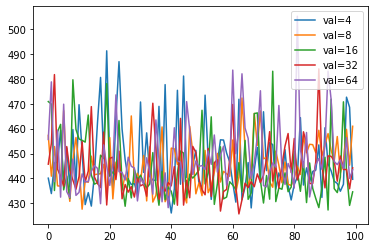

In [53]:
for size, hist in scores.items():
    #plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_loss'], label=('val=%s' % size))

plt.legend()

In [54]:
del scores[4]

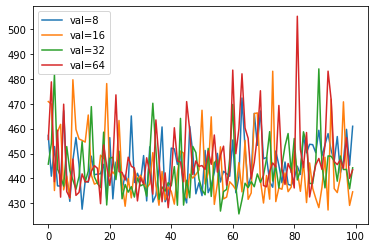

In [55]:
for size, hist in scores.items():
    #plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_loss'], label=('val=%s' % size))

plt.legend()

#### Tuning Convolutional Neural Net model: dropout

In [56]:
def train_c_NN(X_train,y_train,X_val,y_val,layer_size=16,learning_rate=0.1, droprate=0.5):
    normalizer = tf.keras.layers.Normalization(axis=-1)
    normalizer.adapt(np.asarray(X_train))
    
    c_model = tf.keras.Sequential([normalizer,layers.Dense(layer_size,activation='relu'),layers.Dense(units=1), layers.Dropout(droprate)])
    c_model.summary()
    
    c_model.compile(optimizer=tf.optimizers.Adam(learning_rate=learning_rate)
                    ,loss='mean_squared_error')
    c_history = c_model.fit(X_train,y_train,epochs=100,validation_data=(np.asarray(X_val),y_val))
    return c_history

In [57]:
lr = 0.1
size = 16

scores = {}

for dr in [0.0, 0.2, 0.5, 0.8]:
    print(dr)

    history = train_c_NN(X_train,y_train,X_val,y_val,layer_size=size,learning_rate=lr, droprate = dr)
    scores[dr] = history.history

    print()
    print()

0.0
Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_14 (Normaliza  (None, 39)               79        
 tion)                                                           
                                                                 
 dense_25 (Dense)            (None, 16)                640       
                                                                 
 dense_26 (Dense)            (None, 1)                 17        
                                                                 
 dropout (Dropout)           (None, 1)                 0         
                                                                 
Total params: 736
Trainable params: 657
Non-trainable params: 79
_________________________________________________________________
Epoch 1/100
1240/1240 [==============================] - 2s 2ms/step - loss: 475.4927 - val_loss: 440.6966
Epoch 2/1

1240/1240 [==============================] - 2s 1ms/step - loss: 405.3579 - val_loss: 432.9560
Epoch 68/100
1240/1240 [==============================] - 2s 1ms/step - loss: 405.4227 - val_loss: 436.8447
Epoch 69/100
1240/1240 [==============================] - 2s 1ms/step - loss: 404.2440 - val_loss: 440.0818
Epoch 70/100
1240/1240 [==============================] - 2s 1ms/step - loss: 404.1163 - val_loss: 440.0680
Epoch 71/100
1240/1240 [==============================] - 2s 1ms/step - loss: 406.8299 - val_loss: 448.7019
Epoch 72/100
1240/1240 [==============================] - 2s 1ms/step - loss: 407.5115 - val_loss: 447.4111
Epoch 73/100
1240/1240 [==============================] - 2s 1ms/step - loss: 405.0537 - val_loss: 442.8050
Epoch 74/100
1240/1240 [==============================] - 2s 1ms/step - loss: 407.8082 - val_loss: 443.1196
Epoch 75/100
1240/1240 [==============================] - 2s 1ms/step - loss: 406.0974 - val_loss: 435.5257
Epoch 76/100
1240/1240 [=================

1240/1240 [==============================] - 2s 1ms/step - loss: 1518.1327 - val_loss: 601.4949
Epoch 34/100
1240/1240 [==============================] - 2s 1ms/step - loss: 1554.3534 - val_loss: 564.4236
Epoch 35/100
1240/1240 [==============================] - 2s 1ms/step - loss: 1538.6071 - val_loss: 585.8127
Epoch 36/100
1240/1240 [==============================] - 2s 1ms/step - loss: 1536.0782 - val_loss: 577.9411
Epoch 37/100
1240/1240 [==============================] - 2s 1ms/step - loss: 1545.9911 - val_loss: 689.0461
Epoch 38/100
1240/1240 [==============================] - 2s 1ms/step - loss: 1538.4312 - val_loss: 590.4408
Epoch 39/100
1240/1240 [==============================] - 2s 1ms/step - loss: 1559.9388 - val_loss: 667.0648
Epoch 40/100
1240/1240 [==============================] - 2s 1ms/step - loss: 1548.1826 - val_loss: 683.6666
Epoch 41/100
1240/1240 [==============================] - 2s 1ms/step - loss: 1554.6676 - val_loss: 628.1635
Epoch 42/100
1240/1240 [========

1240/1240 [==============================] - 3s 1ms/step - loss: 3324.8989 - val_loss: 1728.5087
Epoch 2/100
1240/1240 [==============================] - 2s 1ms/step - loss: 3281.7227 - val_loss: 1518.8176
Epoch 3/100
1240/1240 [==============================] - 2s 1ms/step - loss: 3237.1587 - val_loss: 1696.1814
Epoch 4/100
1240/1240 [==============================] - 2s 1ms/step - loss: 3303.4761 - val_loss: 2123.6326
Epoch 5/100
1240/1240 [==============================] - 2s 1ms/step - loss: 3264.8706 - val_loss: 1893.3184
Epoch 6/100
1240/1240 [==============================] - 2s 1ms/step - loss: 3273.5254 - val_loss: 1868.5663
Epoch 7/100
1240/1240 [==============================] - 2s 1ms/step - loss: 3270.9746 - val_loss: 1756.7740
Epoch 8/100
1240/1240 [==============================] - 2s 1ms/step - loss: 3265.3164 - val_loss: 1632.4877
Epoch 9/100
1240/1240 [==============================] - 2s 1ms/step - loss: 3261.9592 - val_loss: 1807.1052
Epoch 10/100
1240/1240 [=======

1240/1240 [==============================] - 2s 2ms/step - loss: 3273.3457 - val_loss: 1843.0917
Epoch 76/100
1240/1240 [==============================] - 2s 2ms/step - loss: 3288.0200 - val_loss: 1874.7460
Epoch 77/100
1240/1240 [==============================] - 2s 1ms/step - loss: 3287.2065 - val_loss: 1878.0426
Epoch 78/100
1240/1240 [==============================] - 2s 1ms/step - loss: 3274.4697 - val_loss: 1849.1185
Epoch 79/100
1240/1240 [==============================] - 2s 1ms/step - loss: 3272.8167 - val_loss: 1893.9235
Epoch 80/100
1240/1240 [==============================] - 2s 1ms/step - loss: 3273.0142 - val_loss: 1864.1086
Epoch 81/100
1240/1240 [==============================] - 2s 1ms/step - loss: 3271.3279 - val_loss: 1865.3064
Epoch 82/100
1240/1240 [==============================] - 2s 1ms/step - loss: 3274.5991 - val_loss: 1914.3640
Epoch 83/100
1240/1240 [==============================] - 2s 1ms/step - loss: 3278.1965 - val_loss: 1859.7249
Epoch 84/100
1240/1240 

1240/1240 [==============================] - 2s 2ms/step - loss: 5227.3232 - val_loss: 4426.8735
Epoch 41/100
1240/1240 [==============================] - 2s 1ms/step - loss: 5252.3203 - val_loss: 4529.4976
Epoch 42/100
1240/1240 [==============================] - 2s 1ms/step - loss: 5257.9839 - val_loss: 4593.3452
Epoch 43/100
1240/1240 [==============================] - 2s 1ms/step - loss: 5254.7461 - val_loss: 4639.0942
Epoch 44/100
1240/1240 [==============================] - 2s 1ms/step - loss: 5246.8989 - val_loss: 4529.6943
Epoch 45/100
1240/1240 [==============================] - 2s 1ms/step - loss: 5259.6064 - val_loss: 4661.0986
Epoch 46/100
1240/1240 [==============================] - 2s 2ms/step - loss: 5264.0522 - val_loss: 4510.0874
Epoch 47/100
1240/1240 [==============================] - 2s 1ms/step - loss: 5250.4502 - val_loss: 4519.4946
Epoch 48/100
1240/1240 [==============================] - 2s 1ms/step - loss: 5248.9766 - val_loss: 4501.6851
Epoch 49/100
1240/1240 

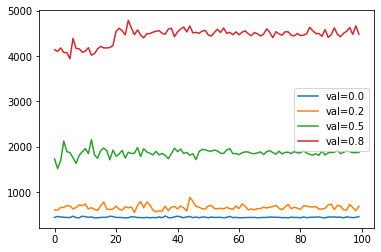

In [58]:
for dr, hist in scores.items():
    plt.plot(hist['val_loss'], label=('val=%s' % dr))

plt.legend()

### Final model

In [ ]:
lr   = 0.1
size = 16
dr   = 0

history = train_c_NN(X_train,y_train,X_val,y_val,layer_size=size,learning_rate=lr, droprate = dr)

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_18 (Normaliza  (None, 39)               79        
 tion)                                                           
                                                                 
 dense_33 (Dense)            (None, 16)                640       
                                                                 
 dense_34 (Dense)            (None, 1)                 17        
                                                                 
 dropout_4 (Dropout)         (None, 1)                 0         
                                                                 
Total params: 736
Trainable params: 657
Non-trainable params: 79
_________________________________________________________________
Epoch 1/100
1240/1240 [==============================] - 2s 1ms/step - loss: 465.1020 - val_loss: 456.8906
Epoch 2/100
1

1240/1240 [==============================] - 2s 2ms/step - loss: 406.2587 - val_loss: 447.6107
Epoch 68/100
1240/1240 [==============================] - 2s 1ms/step - loss: 406.2050 - val_loss: 433.2695
Epoch 69/100
1240/1240 [==============================] - 2s 1ms/step - loss: 404.1653 - val_loss: 462.3209
Epoch 70/100
1240/1240 [==============================] - 2s 1ms/step - loss: 406.9222 - val_loss: 431.5411
Epoch 71/100
1240/1240 [==============================] - 2s 2ms/step - loss: 407.7368 - val_loss: 464.1800
Epoch 72/100
1240/1240 [==============================] - 2s 2ms/step - loss: 405.2836 - val_loss: 438.0072
Epoch 73/100
1240/1240 [==============================] - 2s 2ms/step - loss: 406.0975 - val_loss: 439.2513
Epoch 74/100
1240/1240 [==============================] - 2s 1ms/step - loss: 405.1938 - val_loss: 447.5348
Epoch 75/100
1240/1240 [==============================] - 2s 1ms/step - loss: 404.9630 - val_loss: 481.2745
Epoch 76/100
1240/1240 [=================

In [ ]:
plt.plot(history.history['loss'],label='train_mse')
plt.plot(history.history['val_loss'],label='val_mse')
plt.legend()

In [ ]:
test = X_train
history.model.predict(test).tolist()